In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


# 2. Loading the dataset

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv")

# 3. Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


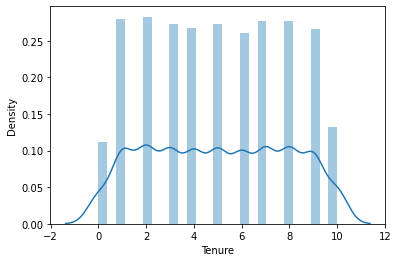

In [11]:
sns.distplot(data['Tenure'])

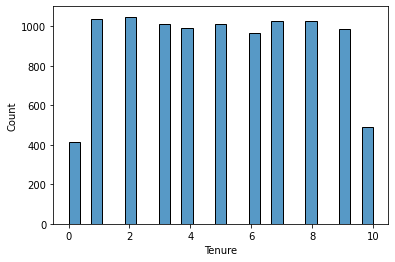

In [12]:
sns.histplot(data['Tenure'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


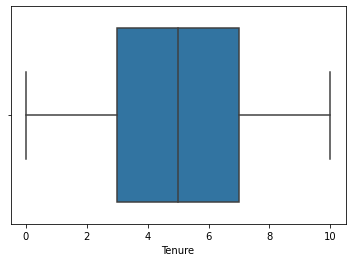

In [13]:
sns.boxplot(data['Tenure'])

# 3. Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


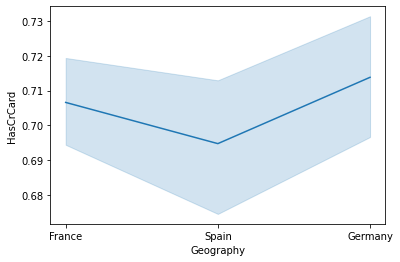

In [14]:
sns.lineplot(data['Geography'], data['HasCrCard'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


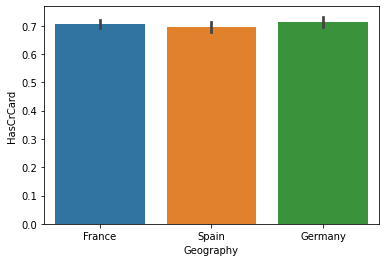

In [15]:
sns.barplot(data['Geography'], data['HasCrCard'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


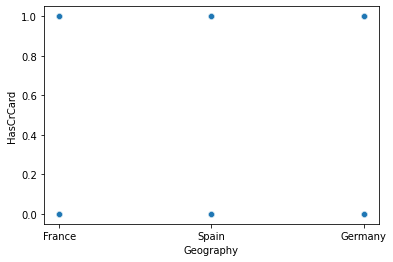

In [16]:
sns.scatterplot(data['Geography'], data['HasCrCard'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


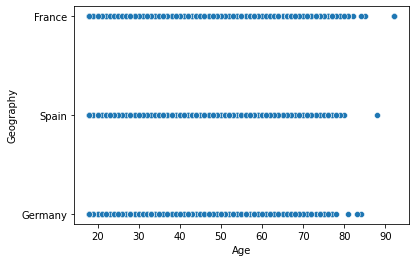

In [17]:
sns.scatterplot(data['Age'], data['Geography'])

# 3. Multivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


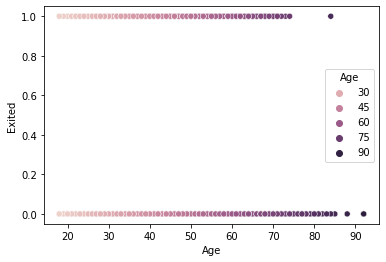

In [18]:
sns.scatterplot(data['Age'], data['Exited'], hue = data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


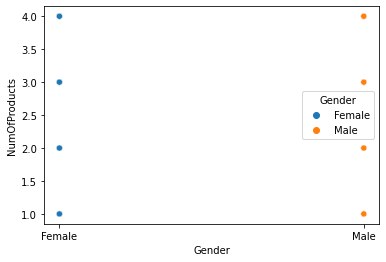

In [19]:
sns.scatterplot(data['Gender'], data['NumOfProducts'], hue = data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


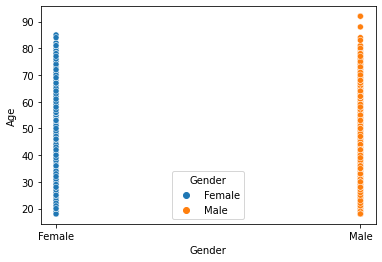

In [20]:
sns.scatterplot(data['Gender'], data['Age'], hue = data['Gender'])

In [ ]:
sns.pairplot(data)

# 4. Descriptive Statistics

## Central Tendency

In [ ]:
data.mean()

In [ ]:
data.median()

In [ ]:
data.mode()

##  Dispersion of Data

In [ ]:
sns.boxplot(data['CreditScore'])

### Interquartile Range

In [ ]:
q = data.quantile([0.75, 0.25])

In [ ]:
q

In [ ]:
iqr = q.iloc[0] - q.iloc[1]

In [ ]:
iqr

In [ ]:
u = q.iloc[0] + 1.5*iqr 


In [ ]:
u

In [ ]:
l = q.iloc[1] - 1.5*iqr


In [ ]:
l

### Variance

In [ ]:
data.var()

### Standard Deviation

In [ ]:
data.std()

In [ ]:
data.notnull()

#### 5.Handling missing values:



In [ ]:
 data.fillna(0)

## 6. Outliers and handling them

In [ ]:
sns.boxplot(data['Age'])

In [ ]:
data['Age'].mean()

In [ ]:
data['Age'] = np.where(data['Age'] > 57, 39, data['Age']) 

In [ ]:
sns.boxplot(data['Age'])

In [ ]:
sns.boxplot(data['CreditScore'])

In [ ]:
data['CreditScore'].mean()

In [ ]:
data['CreditScore'] = np.where(data['CreditScore'] < 400, 650, data['CreditScore']) 

In [ ]:
sns.boxplot(data['CreditScore'])

# 7. Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Surname'] = le.fit_transform(data['Surname'])
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])
data.head()


# 8. Splitting the data

In [ ]:
x = data.iloc[:, 0:4]

In [ ]:
x

In [ ]:
y = data['HasCrCard']

In [ ]:
y

# 9. Scaling the independant variables

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [ ]:
x_scaled

# 10. Splitting into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0) 

In [ ]:
x_train.shape

In [ ]:
x_train

In [ ]:
x_test.shape

In [ ]:
x_test

In [ ]:
y_train.shape

In [ ]:
y_train

In [ ]:
y_test.shape

In [ ]:
y_test